In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\MirekR\\Documents\\Python\\kodilla\\fatal-police-shootings-data.csv')

In [2]:
df['licznik']=1

In [3]:
# zestawienie liczby ofiar interwencji według rasy (‘race’) oraz czy wykazywały one oznaki choroby psychicznej
chor=df.pivot_table(values='licznik',index='race',columns='signs_of_mental_illness',aggfunc=np.sum)
total=chor[False].sum()+chor[True].sum()
chor

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [4]:
# dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras
def odsetek(x):
    return x/total*100
chor['odsetek'] = chor[True].apply(lambda x: odsetek(x))
chor

signs_of_mental_illness,False,True,odsetek
race,,,
A,69,24,0.490296
B,1114,184,3.758938
H,745,157,3.207354
N,64,14,0.286006
O,37,11,0.224719
W,1763,713,14.565884


In [5]:
# która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji
chor.sort_values(by='odsetek',ascending=False)[:1]

signs_of_mental_illness,False,True,odsetek
race,,,
W,1763,713,14.565884


In [6]:
# Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji
df['date'] = pd.to_datetime(df['date'])
df['day']=df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,licznik,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,1,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,1,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,1,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,1,Tuesday


In [7]:
# Zlicz interwencje według odpowiedniego dnia tygodnia.
def nr_dnia(dzień):
    if dzień=='Monday':
        x=1
    if dzień=='Tuesday':
        x=2
    if dzień=='Wednesday':
        x=3
    if dzień=='Thursday':
        x=4
    if dzień=='Friday':
        x=5
    if dzień=='Saturday':
        x=6
    if dzień=='Sunday':
        x=7
    return x
df['number_of_day'] = df['day'].apply(lambda x: nr_dnia(x))
dzień=df.groupby(['number_of_day','day']).sum()['licznik']
dzień

C:\Users\MirekR\AppData\Local\Temp\ipykernel_10636\3565450511.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dzień=df.groupby(['number_of_day','day']).sum()['licznik']


number_of_day  day      
1              Monday       726
2              Tuesday      816
3              Wednesday    829
4              Thursday     810
5              Friday       761
6              Saturday     721
7              Sunday       753
Name: licznik, dtype: int64

C:\Users\MirekR\AppData\Local\Temp\ipykernel_10636\1542528398.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes.bar(sortowanie.groupby(['day']).count().index,sortowanie.groupby(['day']).sum()['licznik'])


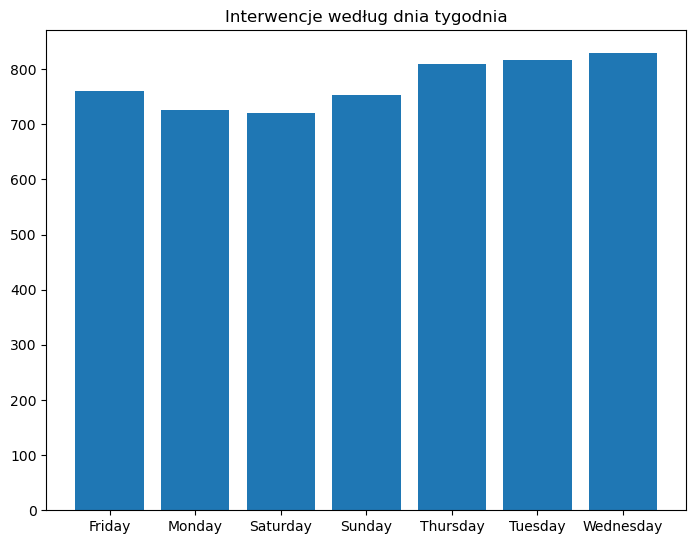

In [8]:
# Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
sortowanie = df.sort_values(by=['number_of_day'])
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]) # left, bottom, width, height
#axes.bar(df['day'],df['licznik'].sum())
sortowanie = df.sort_values(by=['number_of_day'])
axes.bar(sortowanie.groupby(['day']).count().index,sortowanie.groupby(['day']).sum()['licznik'])
axes.set_title('Interwencje według dnia tygodnia')
plt.show()

In [9]:
#Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. 
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
population = pd.DataFrame(data[0])
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=1)
states = pd.DataFrame(data[0])
states=states[['Codes:','Unnamed: 5']]
states.rename(columns={'Codes:': 'state_name'}, inplace=True)
states.set_index('Unnamed: 5',inplace=True)
df=df.join(states,on='state',how='inner')
population=population[['State','Census population, April 1, 2020 [1][2]']]
population=population.rename(columns={'Census population, April 1, 2020 [1][2]': 'population'})
population=population.set_index('State')
df=df.join(population,on='state_name',how='inner')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,licznik,day,number_of_day,state_name,population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,Friday,5,Washington,7705281
102,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,1,Tuesday,2,Washington,7705281
209,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,1,Thursday,4,Washington,7705281
295,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,1,Tuesday,2,Washington,7705281
335,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,1,Monday,1,Washington,7705281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,1,Tuesday,2,Vermont,643077
1229,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,1,Thursday,4,Rhode Island,1097379
1434,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,1,Monday,1,Rhode Island,1097379
2807,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,1,Thursday,4,Rhode Island,1097379


In [10]:
#Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.
na_tys_mieszk=df[['state_name','population','licznik']]
na_tys_mieszk=na_tys_mieszk.groupby(['state_name','population']).count()
na_tys_mieszk=na_tys_mieszk.reset_index()
na_tys_mieszk['incydenty_na_tys_mieszk'] = na_tys_mieszk['licznik']/na_tys_mieszk['population']*1000
na_tys_mieszk[['state_name','incydenty_na_tys_mieszk']]  

,state_name,incydenty_na_tys_mieszk
0,Alabama,0.020699
1,Alaska,0.053178
2,Arizona,0.035517
3,Arkansas,0.027561
4,California,0.020208
5,Colorado,0.033774
6,Connecticut,0.005824
7,Delaware,0.013132
8,District of Columbia,0.018853
9,Florida,0.016250
